In [10]:
from Bio.Seq import Seq
from Bio import SeqIO

In [11]:
sc1g = SeqIO.read('data/sars_cov_1_genome.fasta', 'fasta')
sc2g = SeqIO.read('data/sars_cov_2_genome.fasta', 'fasta')

print('Length of Sars-Cov-1 Genome: {}'.format(len(sc1g)))
print('Length of Sars-Cov-2 Genome: {}'.format(len(sc1g)))

Length of Sars-Cov-1 Genome: 29751
Length of Sars-Cov-2 Genome: 29751


In [12]:
import os
from Bio import pairwise2
from Bio import SeqIO
from Bio.Align import substitution_matrices

def seqsim(alignfile):
    blosum62 = substitution_matrices.load("BLOSUM62")

    # basedir = '/Users/davidwang/projects/sarscov2/data'
    # seq1 = SeqIO.read('{}/sars_cov_2_e_prot.fasta'.format(basedir), 'fasta')
    # seq2 = SeqIO.read('{}/mers_cov_e_prot.fasta'.format(basedir), 'fasta')
    # aligns = pairwise2.align.globalds(seq1.seq, seq2.seq, blosum62, -10, -0.5)

    # Read in Sequences Aligned by MAFFT
    aligndata = open(alignfile).read()
    seqs = aligndata.split('>')
    seq1 = ''.join(seqs[1].split('\n')[1:])
    seq2 = ''.join(seqs[2].split('\n')[1:])
    
    return {
        'seq1': seq1,
        'seq2': seq2,
        'similarity': similarity_score(seq1, seq2),
    }

def cdna_to_rna(dna):
    return str(dna).replace('T', 'U')

def similarity_score(ref, seq):
    similar = 0
    
    for i in range(len(ref)):
        if ref[i] == seq[i]:
            similar += 1

    return similar / len(ref)

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def plot_protein_sim(data):
    width = 0.25
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    proteins = ['E Protein', 'M Protein', 'N Protein', 'S Protein']
    locs = np.arange(len(data[0]))
    
    ax.set_ylabel('% Sequence  Similarity')
    ax.set_title('Sequence Similarity to Sars-Cov-2')
    
    plt.bar(locs, data[0], color='g', width=width, label=proteins[0])
    plt.bar(locs+width, data[1], color='b', width=width, label=proteins[0])
    plt.xticks(range(len(proteins)), proteins)
    plt.yticks(np.arange(0, 101, 10))
    ax.legend(labels=['Mers-Cov 2012', 'Sars-Cov 2004'])
    
    plt.show()

In [28]:
proteins = ['e', 'm', 'n', 's']
sim_results = [[], []]

basedir = '/Users/davidwang/projects/sarscov2/data'
for p in proteins:
    alignfile = '{}/sars_cov_2_mers_cov_{}_prot.ali'.format(basedir, p)
    result = seqsim(alignfile)
    sim_results[0].append(result['similarity']*100)

    basename = os.path.basename(alignfile)
    print('{} Protein Length: {} Similarity: {:.1f}%'.format(basename, len(result['seq1']), result['similarity']*100))
    
for p in proteins:
    alignfile = '{}/sars_cov_2_sars_cov_1_{}_prot.ali'.format(basedir, p)
    result = seqsim(alignfile)
    sim_results[1].append(result['similarity']*100)
    
    basename = os.path.basename(alignfile)
    print('{} Protein Length: {} Similarity: {:.1f}%'.format(basename, len(result['seq1']), result['similarity']*100))

sars_cov_2_mers_cov_e_prot.ali Protein Length: 82 Similarity: 35.4%
sars_cov_2_mers_cov_m_prot.ali Protein Length: 223 Similarity: 40.4%
sars_cov_2_mers_cov_n_prot.ali Protein Length: 450 Similarity: 45.8%
sars_cov_2_mers_cov_s_prot.ali Protein Length: 1451 Similarity: 30.5%
sars_cov_2_sars_cov_1_e_prot.ali Protein Length: 76 Similarity: 94.7%
sars_cov_2_sars_cov_1_m_prot.ali Protein Length: 222 Similarity: 90.5%
sars_cov_2_sars_cov_1_n_prot.ali Protein Length: 422 Similarity: 90.5%
sars_cov_2_sars_cov_1_s_prot.ali Protein Length: 1277 Similarity: 76.0%


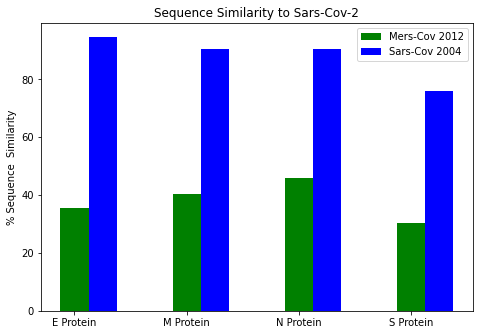

In [24]:
plot_protein_sim(sim_results)

In [47]:
import pandas as pd

df = pd.read_csv('data/200938383919-sars_cov_vipr_epitopes.tsv', sep='\t')

108

In [106]:
total = len(df))
# Get the number or rows that have 'B Cell' in the 'Assay Type Category Column'
print('Assay Type Category')
print('B Cell: {}'.format(df['Assay Type Category'].apply(lambda x: 'B Cell' in x).sum()))
print('T Cell: {}'.format(df['Assay Type Category'].apply(lambda x: 'T Cell' in x).sum()))
print('MHC Binding: {}'.format(df['Assay Type Category'].apply(lambda x: 'MHC Binding' in x).sum()))

1394
Assay Type Category
B Cell: 391
T Cell: 257
MHC Binding: 965


In [112]:
df.head(1)

,IEDB ID,Epitope Sequence,Protein Names,Host,Assay Type Category,Assay Result,MHC Allele Name,MHC Allele Class,Method,Measurement,Unnamed: 10
0,307,AALVSGTATAGWTFGAG,"E2 glycoprotein precursor,spike glycoprotein,","Human,Mouse,Rabbit,Human,Mouse,Rabbit","B Cell,B Cell,B Cell,B Cell,B Cell,B Cell","Positive,Positive,Positive,Positive,Positive,P...","-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-","-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-","ELISA,ELISA,ELISA,ELISA,ELISA,ELISA","qualitative binding,qualitative binding,qualit...",NaN


In [176]:
seen = set()

for row in df.itertuples():
    measurements = row[9].split(',')
    for m in measurements:
        if m not in seen:
            seen.add(m)

seen

{'3H-thymidine',
 '51 chromium',
 'CFSE',
 'ELISA',
 'ELISPOT',
 'ICS',
 'antigen inhibition',
 'bio-layer interferometry assay',
 'bioassay',
 'biological activity',
 'cellular MHC/competitive/fluorescence',
 'cellular MHC/direct/fluorescence',
 'cross blocking',
 'electron microscopy',
 'flow cytometry',
 'immuno staining',
 'immunohistochemistry',
 'in vitro assay',
 'in vivo assay',
 'in vivo skin test',
 'microarray',
 'multimer/tetramer',
 'purified MHC',
 'purified MHC/competitive/fluorescence',
 'purified MHC/competitive/radioactivity',
 'purified MHC/direct/fluorescence',
 'purified MHC/direct/radioactivity',
 'small-angle scattering assay',
 'surface plasmon resonance (SPR)',
 'western blot',
 'x-ray crystallography'}

{'3H-thymidine',
 '51 chromium',
 'CFSE',
 'ELISA',
 'ELISPOT',
 'ICS',
 'antigen inhibition',
 'bio-layer interferometry assay',
 'bioassay',
 'biological activity',
 'cellular MHC/competitive/fluorescence',
 'cellular MHC/direct/fluorescence',
 'cross blocking',
 'electron microscopy',
 'flow cytometry',
 'immuno staining',
 'immunohistochemistry',
 'in vitro assay',
 'in vivo assay',
 'in vivo skin test',
 'microarray',
 'multimer/tetramer',
 'purified MHC',
 'purified MHC/competitive/fluorescence',
 'purified MHC/competitive/radioactivity',
 'purified MHC/direct/fluorescence',
 'purified MHC/direct/radioactivity',
 'small-angle scattering assay',
 'surface plasmon resonance (SPR)',
 'western blot',
 'x-ray crystallography'}

In [113]:
df[['Host', 'Assay Type Category', 'Assay Result']].head(1)

,Host,Assay Type Category,Assay Result
0,"Human,Mouse,Rabbit,Human,Mouse,Rabbit","B Cell,B Cell,B Cell,B Cell,B Cell,B Cell","Positive,Positive,Positive,Positive,Positive,P..."


In [ ]:
df[['Assay Result']].filter(lambda x: 'Negative')

In [177]:
# Using 'Positive in result[i]'
# {'B Cell': 2830, 'T Cell': 306, 'MHC Binding': 22938}

# Using 'Positive == result[i]'
# {'B Cell': 2756, 'T Cell': 288, 'MHC Binding': 1548}

# Using 'Positive == result[i] breaking after first Positive'
# {'B Cell': 2756, 'T Cell': 288, 'MHC Binding': 1548}

assay_dict = {
    'B Cell': 0,
    'T Cell': 0,
    'MHC Binding' : 0,
}

for row in df.itertuples():
    human_indicies = [i for i, x in enumerate(row[4].split(',')) if x == 'Human'] # Hosts
    assay_type = row[5].split(',')[0] # Assay Types
    result = row[6].split(',') # Assay Results
    methods = row[9].split(',') # Methods
    
    for i, m in zip(human_indicies, methods):
        if 'Positive' == result[i] and m in [
             'ELISA',
             'ELISPOT',
             'ICS',
             'cellular MHC/competitive/fluorescence',
             'cellular MHC/direct/fluorescence',
             'purified MHC',
             'purified MHC/competitive/fluorescence',
             'purified MHC/competitive/radioactivity',
             'purified MHC/direct/fluorescence',
             'purified MHC/direct/radioactivity',
        ]:
            assay_dict[assay_type] += 1

In [149]:
assay_dict

{'B Cell': 2830, 'T Cell': 306, 'MHC Binding': 22938}

In [151]:
assay_dict

{'B Cell': 2756, 'T Cell': 288, 'MHC Binding': 1548}

In [153]:
assay_dict

{'B Cell': 331, 'T Cell': 43, 'MHC Binding': 100}

In [178]:
assay_dict

{'B Cell': 1437, 'T Cell': 188, 'MHC Binding': 1355}

In [36]:
rna = cdna_to_rna(cnuc.seq)

NameError: name 'cnuc' is not defined

In [1]:
seq_ids = [
 'YP_005352862.1',
 'AMN91620.1',
 'YP_002308478.1',
 'P0C6Y5.1',
 'APD51497.1',
 'AVA26872.1',
 'AKJ21970.1',
 'YP_001718610.1',
 'AHB63507.1',
 'AAS00078.1',
 'ACV87277.1',
 'YP_009555238.1',
 'YP_209229.2',
 'ARB07596.1',
 'ATG84853.1',
 'ABN10847.1',
 'AAP33696.1',
 'AVP25405.1',
]

In [2]:
from Bio import Entrez
from Bio import SeqIO
Entrez.email = 'something@something.com'

seqs = {}
for s_id in seq_ids:
    handle = Entrez.efetch(db='protein', id=s_id, rettype='gb', retmode='text')
    seq = SeqIO.read(handle, 'genbank')
    seqs[s_id] = seq

SeqRecord(seq=Seq('MGSKQVDHTCLTIPPNPSKTLALFITTVAAQEGKTFKTVDDVKTISKFNIRRGN...VLF', IUPACProtein()), id='YP_005352862.1', name='YP_005352862', description='orf1ab gene product [Night heron coronavirus HKU19]', dbxrefs=['BioProject:PRJNA485481'])

In [155]:
SeqIO.write(seqs, 'all.faa', 'fasta')

18

In [181]:
with open('clustalo.clustal_num') as f:
    data = f.readlines()

In [186]:
"""
Got the following error when using consurf:

"The uploaded MSA file, which appears to be in clustalw format, contains non-standard characters: "J". 
To fix the format please replace all non-standard characters with standard characters
(gaps : "-" Amino Acids : "A" , "C" , "D" .. "Y") and resubmit your query."

This is because we have a 'J' amino acid in on line 998 in our clustalo.clustal_num multi alignment file

'ATG84853.1          GTPNEKLVTTSTAPDFVAFNVFQGIETAVGHYVHARLKGGJILKFDSGTVSKTSDWKCKV	1788' 

Apparently a 'J' is supposed to indicate either 'I' or 'L'.
We will replace with an 'L' in this case because ABN10847.1 and AVP25405.1 have 'L's in that position
which is the majority.
"""

# Replace ambiguous amino acids with the majority e.g. J -> L because J can be either I or L.
# def replace_ambiguous_aa(rows):
#     for i, r in enumerate(rows):
#         cols = r.split()
#         align = cols[1] if len(cols) > 2 else ''
#         if 'J' in align:
#             row = cols[1].replace('J', 'L')
            
# replace_ambiguous_aa(data)
# open('clustalo_unique_aa.clustal_num', 'w').write(''.join(data))

239485

In [37]:
'''
Get Accession IDs for Sars-Cov-2 Genomes https://www.pnas.org/content/117/17/9241?cct=2302
Paper: Phylogenetic network analysis of SARS-CoV-2 genomes
'''

import csv

ids = []
with open('forster_data/2b Cluster assignments-Table 1.csv') as file:
    reader = csv.reader(file)
    
    for i, row in enumerate(reader):
        if i > 3:
            ids.append(row[3])
            
print(ids)

['EPI_ISL_402123', 'EPI_ISL_406798', 'EPI_ISL_402119', 'EPI_ISL_402128', 'EPI_ISL_402129', 'EPI_ISL_402130', 'EPI_ISL_403930', 'EPI_ISL_402121', 'EPI_ISL_402132', 'EPI_ISL_412898', 'EPI_ISL_412899', 'EPI_ISL_402124', 'EPI_ISL_403931', 'EPI_ISL_403929', 'EPI_ISL_402127', 'EPI_ISL_402125', 'EPI_ISL_402120', 'EPI_ISL_406800', 'EPI_ISL_408514', 'EPI_ISL_408515', 'EPI_ISL_403928', 'EPI_ISL_406716', 'EPI_ISL_406717', 'EPI_ISL_406801', 'EPI_ISL_411957', 'EPI_ISL_412459', 'EPI_ISL_403962', 'EPI_ISL_406030', 'EPI_ISL_405839', 'EPI_ISL_408486', 'EPI_ISL_410301', 'EPI_ISL_406593', 'EPI_ISL_403963', 'EPI_ISL_403932', 'EPI_ISL_403933', 'EPI_ISL_403934', 'EPI_ISL_403935', 'EPI_ISL_408484', 'EPI_ISL_404227', 'EPI_ISL_406594', 'EPI_ISL_406595', 'EPI_ISL_403936', 'EPI_ISL_404228', 'EPI_ISL_404228', 'EPI_ISL_412978', 'EPI_ISL_408480', 'EPI_ISL_403937', 'EPI_ISL_412979', 'EPI_ISL_412980', 'EPI_ISL_412981', 'EPI_ISL_408481', 'EPI_ISL_408485', 'EPI_ISL_404895', 'EPI_ISL_407313', 'EPI_ISL_408482', 'EPI_ISL_

In [29]:
seqs = SeqIO.[('gisaid/msa_0727/msa_0727.fasta', 'fasta')